In [1]:
import numpy as np 
import pandas as pd 

In [2]:
import os

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from keras.preprocessing import image
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dense, Dropout

In [4]:
train_dir = "C:\\Users\\pc\\Downloads\\Waste dataset\\Train"
test_dir = "C:\\Users\\pc\\Downloads\\Waste dataset\\Test"

In [5]:
tf.random.set_seed(42)
generator = ImageDataGenerator(rescale = 1./255.,
                              horizontal_flip=True,
                              vertical_flip=False,
                              zoom_range=0.05,
                              rotation_range=25)

In [6]:
train_data = generator.flow_from_directory(train_dir,
                                               batch_size=32, 
                                               target_size=(224, 224), 
                                               class_mode="binary", 
                                               seed=42)

test_data = generator.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

Found 22320 images belonging to 2 classes.
Found 5582 images belonging to 2 classes.


In [7]:
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

In [9]:
from tensorflow.keras.layers import Dropout, BatchNormalization
import tensorflow_hub as hub
from tensorflow.keras import layers

# Update deprecated functions
from tensorflow.compat.v1 import losses

feature_extractor_layer = hub.KerasLayer(resnet_url,
                                         trainable=False, 
                                         name='feature_extraction_layer',
                                         input_shape=(224, 224, 3))

# Update deprecated function usage
loss_fn = losses.sparse_softmax_cross_entropy


In [10]:
import tensorflow as tf
from tensorflow.keras.layers import Dropout, BatchNormalization, Dense, Lambda
import tensorflow_hub as hub

# Assuming you have defined `resnet_url`
feature_extractor_layer = hub.KerasLayer(resnet_url,
                                         trainable=False,
                                         name='feature_extraction_layer',
                                         input_shape=(224, 224, 3))

# Create a Sequential model
resnet_model = tf.keras.Sequential([
    Lambda(lambda x: feature_extractor_layer(x)),  # Wrap feature_extractor_layer within a Lambda layer
    Dropout(0.2),
    Dense(512, activation="relu"),
    Dense(256, activation="relu"),
    BatchNormalization(),
    Dropout(0.2),
    Dense(128, activation="relu"),
    Dense(1, activation='sigmoid', name='output_layer')
])

# Compile the model
resnet_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])


In [11]:
resnet_model.compile(loss='binary_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [13]:
from tensorflow.compat.v1 import placeholder
from tensorflow.compat.v1 import get_default_graph

# Assuming you've defined a custom PyDataset class, update it if necessary

# Assuming resnet_model is your model instance
resnet_model_history = resnet_model.fit(train_data,
                                        epochs=10,
                                        steps_per_epoch=len(train_data),
                                        validation_data=test_data)

# Update deprecated function usages
loss_fn = tf.compat.v1.losses.sparse_softmax_cross_entropy

Epoch 1/10
698/698 ━━━━━━━━━━━━━━━━━━━━ 1328s 2s/step - accuracy: 0.9345 - loss: 0.1734 - val_accuracy: 0.9287 - val_loss: 0.1922
Epoch 2/10


C:\Users\pc\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


698/698 ━━━━━━━━━━━━━━━━━━━━ 339s 485ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9280 - val_loss: 0.1939
Epoch 3/10
698/698 ━━━━━━━━━━━━━━━━━━━━ 1717s 2s/step - accuracy: 0.9402 - loss: 0.1558 - val_accuracy: 0.9249 - val_loss: 0.2044
Epoch 4/10
698/698 ━━━━━━━━━━━━━━━━━━━━ 343s 492ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9280 - val_loss: 0.1975
Epoch 5/10
698/698 ━━━━━━━━━━━━━━━━━━━━ 1714s 2s/step - accuracy: 0.9507 - loss: 0.1296 - val_accuracy: 0.9303 - val_loss: 0.2083
Epoch 6/10
698/698 ━━━━━━━━━━━━━━━━━━━━ 337s 482ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9291 - val_loss: 0.2104
Epoch 7/10
698/698 ━━━━━━━━━━━━━━━━━━━━ 1721s 2s/step - accuracy: 0.9548 - loss: 0.1191 - val_accuracy: 0.8859 - val_loss: 0.2709
Epoch 8/10
698/698 ━━━━━━━━━━━━━━━━━━━━ 338s 484ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8861 - val_loss: 0.2735
Epoch 9/10
698/698 ━━━━━━━━━━━━━━━━━━━━ 1739s 2s/step - accur

In [14]:
resnet_model.evaluate(test_data)

175/175 ━━━━━━━━━━━━━━━━━━━━ 339s 2s/step - accuracy: 0.9291 - loss: 0.2087


[0.20421145856380463, 0.9285202622413635]

In [26]:
resnet_model.compile(optimizer='adam', loss=' tf.compat.v1.losses.sparse_softmax_cross_entropy', metrics=['accuracy'])


In [30]:
# Save the model
resnet_model.save("resnet_model.keras")


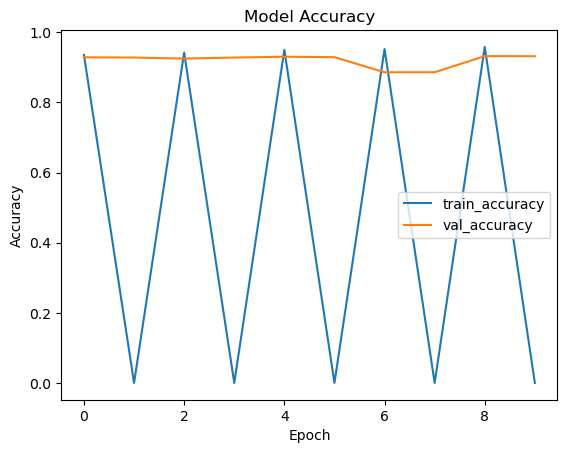

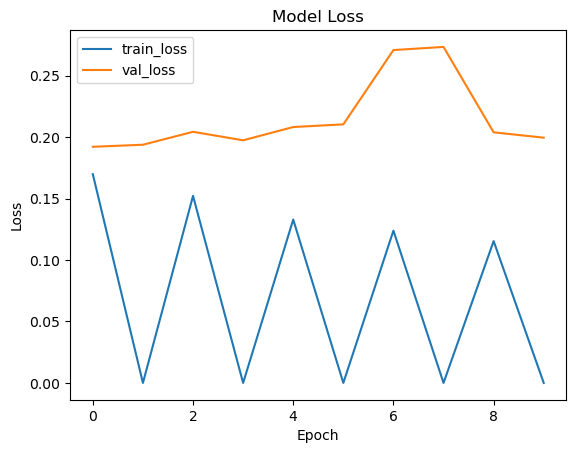

In [31]:
# Plotting accuracy
plt.plot(resnet_model_history.history['accuracy'], label='train_accuracy')
plt.plot(resnet_model_history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting loss
plt.plot(resnet_model_history.history['loss'], label='train_loss')
plt.plot(resnet_model_history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


175/175 ━━━━━━━━━━━━━━━━━━━━ 348s 2s/step


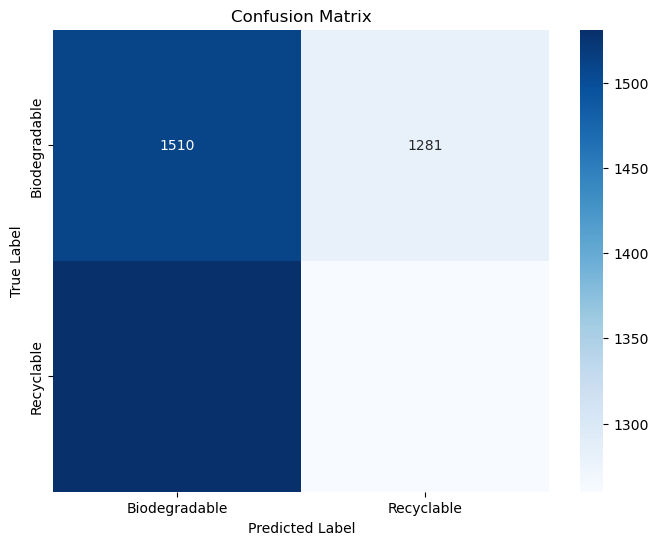

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predictions on test data
y_pred = resnet_model.predict(test_data)
y_pred = (y_pred > 0.5)  # Converting probabilities to binary predictions

# True labels
true_labels = test_data.classes

# Confusion matrix
cm = confusion_matrix(true_labels, y_pred)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_data.class_indices.keys(), yticklabels=test_data.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


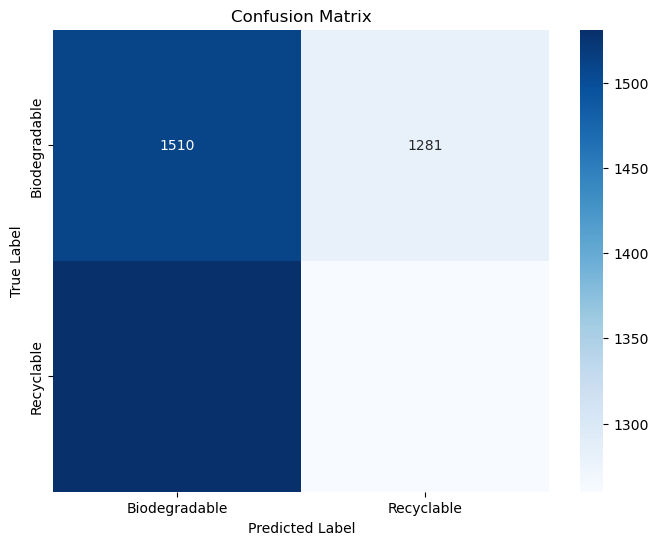

In [33]:
# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt=".0f", cmap="Blues", xticklabels=test_data.class_indices.keys(), yticklabels=test_data.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


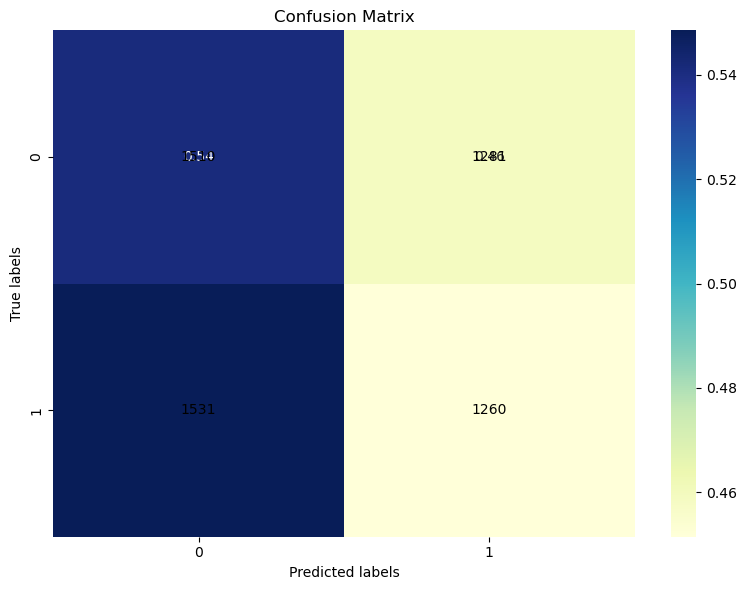

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(8, 6))

# Normalize the confusion matrix
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot heatmap
sns.heatmap(cm_norm, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0)

# Add text annotations with adjusted positioning
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        if cm[i, j] != 0:
            plt.text(j + 0.5, i + 0.5, '{:.0f}'.format(cm[i, j]), ha='center', va='center')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


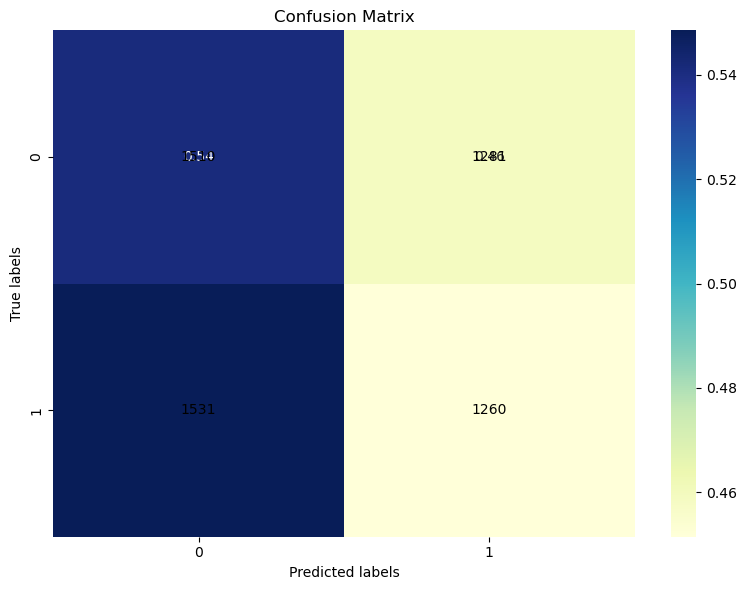

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(8, 6))

# Normalize the confusion matrix
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot heatmap
sns.heatmap(cm_norm, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0)

# Add text annotations with adjusted positioning
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        if cm[i, j] != 0:
            plt.text(j + 0.5, i + 0.5, '{:.0f}'.format(cm[i, j]), ha='center', va='center', color='black')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


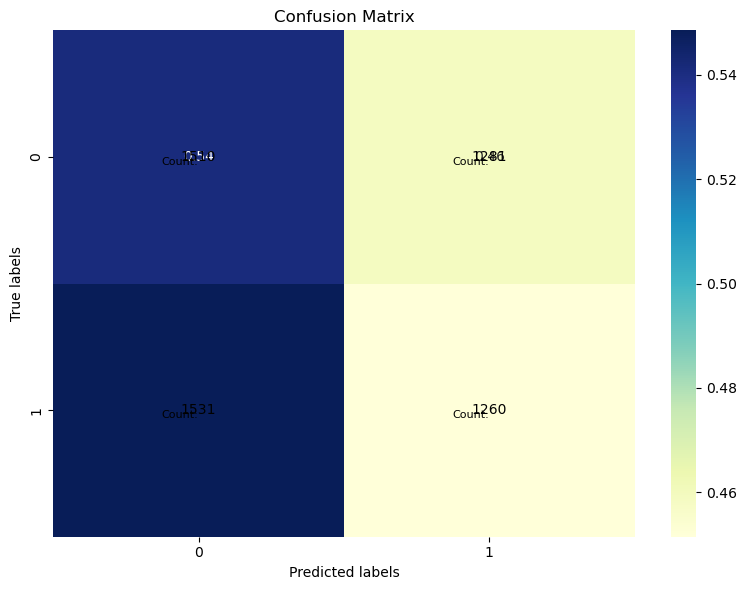

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(8, 6))

# Normalize the confusion matrix
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot heatmap
sns.heatmap(cm_norm, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0)

# Add text annotations with adjusted positioning
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        if cm[i, j] != 0:
            plt.text(j + 0.5, i + 0.5, '{:.0f}'.format(cm[i, j]), ha='center', va='center', color='black')
            plt.text(j + 0.5, i + 0.5, 'Count:', ha='right', va='top', color='black', fontsize=8)

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


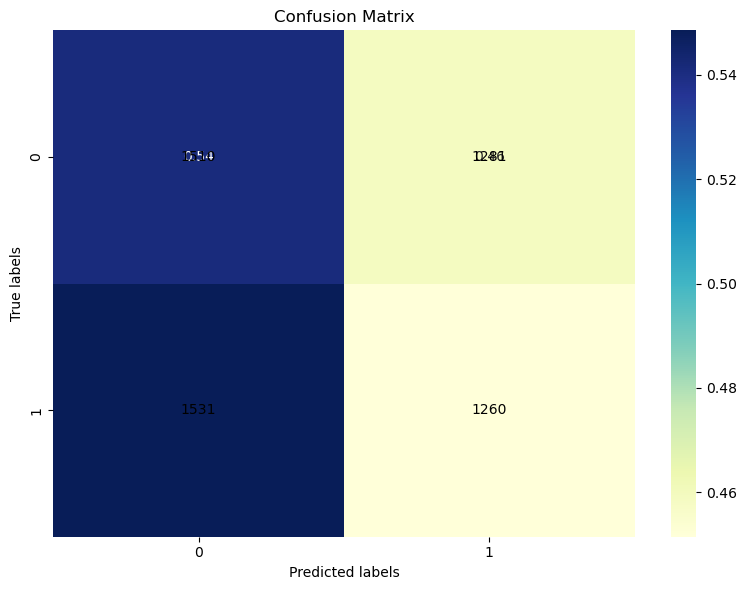

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(8, 6))

# Normalize the confusion matrix
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot heatmap
sns.heatmap(cm_norm, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0)

# Add text annotations with adjusted positioning
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        if cm[i, j] != 0:
            # Add white transparent box
            plt.text(j, i, '', color='white', bbox=dict(facecolor='white', alpha=0.5, boxstyle='round,pad=0.3'))
            # Add text annotation
            plt.text(j + 0.5, i + 0.5, '{:.0f}'.format(cm[i, j]), ha='center', va='center', color='black')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


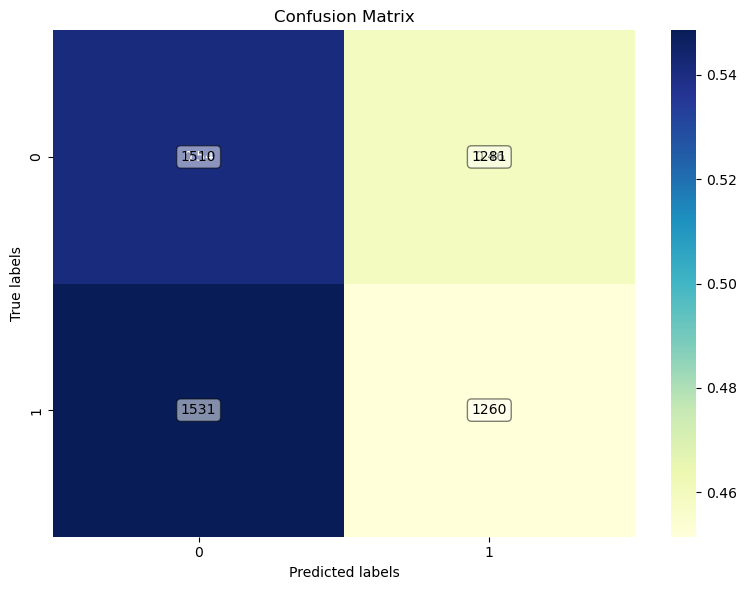

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(8, 6))

# Normalize the confusion matrix
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot heatmap
sns.heatmap(cm_norm, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0)

# Add text annotations with adjusted positioning
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        if cm[i, j] != 0:
            # Add white transparent box behind the number
            plt.text(j + 0.5, i + 0.5, '{:.0f}'.format(cm[i, j]), ha='center', va='center', color='black', bbox=dict(facecolor='white', alpha=0.5, boxstyle='round,pad=0.3'))

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()
